# Orders

This limit order book is taken from Borsa Istanbul data of Garanti on September 20. There are three types of orders. Add, Cancel and Execute orders. Add orders are limit orders and Execute orders are market orders. While add orders increases the quantity in the table, cancel and execute orders decreases the quantity.

## Execute orders

According to [*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU) paper, The highest buy price is bid price (PB) and lowest sell price is ask price (PA). If there is a sell order with price PB, the order is immediately executed. If there is a buy order with price PA, it is also immediately executed. This type of orders are named as market orders. In our code, they are execute orders. The quantity changes of execute orders with time can be observed below for Garanti on September 20. 

In [12]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import lob
import matplotlib.pyplot as plt
import time
import numpy as np
from orderFeatures import orderFeatures
import scipy
import scipy.stats as stats
from scipy.stats import expon
import math

Populating the interactive namespace from numpy and matplotlib


The code below is executed from Itch file to prepare data. It takes nearly a minute to complete. 

> Attention: Please change the file directory when creating a lob object !

> Attention: The code will run about 1 minute and print a lot of things, use with caution

In [2]:
start_time = time.time()
garantiLob = lob.lob('GARAN.E', '/Users/canaltinigne/Desktop/pyITCH/20170920i1p1.itch')

print("Lob finished in %s seconds" % (time.time() - start_time))

Lob finished in 63.62042999267578 seconds


We can access quantity features from variable *orderFeatures* in lob class.

In [96]:
print(orderFeatures)

{'lambdasForLimitSellOrder': [0, 2690434.571428581, 748458.1428571446, 214404.85714285728, 118272.71428571429, 271915.4285714283, 118304.71428571422, 47546.71428571429, 20544.714285714294, 25355.428571428572, 25618.285714285717, 1510.7142857142853, 28086.142857142866, 13814.142857142859, 9959.714285714286, 7164.857142857143, 4718.571428571429, 11909.571428571428, 3143.4285714285716, 0.2857142857142857, 14857.42857142857, 0.2857142857142857, 15728.857142857143, 290.42857142857144, 142.85714285714286, 71.42857142857143, 0, 7.142857142857143, 3.142857142857143, 24.428571428571438, 170.28571428571436, 7.571428571428572, 4.857142857142858, 7430.142857142857, 0, 0, 0, 7430.714285714285, 0, 57.142857142857146, 0, 1479.0, 0, 0, 0, 0, 7.142857142857143, 28.571428571428573, 0, 0, 0, 0, 71.42857142857143, 0, 0, 0.2857142857142857, 14.285714285714286, 0, 144.28571428571428, 0, 0, 0, 0, 0, 0, 0, 0.7142857142857143], 'lambdasForLimitBuyOrderHourly': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Change in Quantities of Execute Orders 

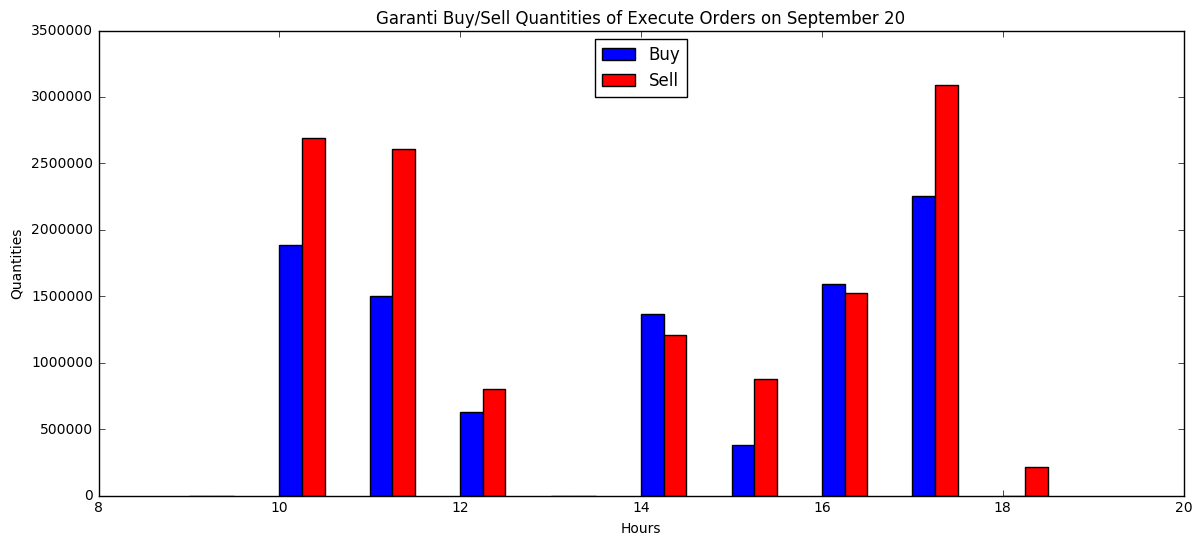

In [13]:
X = np.arange(9,19)

plt.figure(1)  # to let the index start at 1
plt.bar(X + 0.00, orderFeatures['executeBuyQuantity'], color='b', width=0.25, label='Buy')
plt.bar(X + 0.25, orderFeatures['executeSellQuantity'], color='r', width=0.25, label='Sell')
plt.title('Garanti Buy/Sell Quantities of Execute Orders on September 20')
plt.xlabel('Hours')
plt.ylabel('Quantities')
plt.legend(loc=9)

### Arrival Rate of Execute Orders (Market Orders)

According to [*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU) paper, Market buy (respectively sell) orders arrive at independent, exponential times with rate μ. With Maximum Likelihood Estimation approach, this rate for Garanti data can be calculated by finding the mean of the data.

> Zero values are ignored since it happens when the market is closed !

In [14]:
executeSellRate = np.mean([x for x in orderFeatures['executeSellQuantity'] if x != 0])
print("μ(Sell): {} quantities per hour.".format(executeSellRate))
executeBuyRate = np.mean([x for x in orderFeatures['executeBuyQuantity'] if x != 0])
print("μ(Buy):  {:.9} quantities per hour.".format(executeBuyRate))

μ(Sell): 1626992.0 quantities per hour.
μ(Buy):  1373500.29 quantities per hour.


## Limit orders (Add orders)

"A limit order sits in the order book until it is either executed against a market order or it is canceled. A limit order may be executed very quickly if it corresponds to a price near the bid and the ask, but may take a long time if the market price moves away from the requested price or if the requested price is too far from the bid/ask." (Cont et al, 2010). 

[*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU)

### Arrival Rate of Limit Orders

According to A Stochastic Model for Order Book Dynamics paper, Limit buy (respectively sell) orders arrive at a distance of i ticks from the opposite best quote at independent, exponential times with rate lambda. If there is a limit buy order we need to find the price's distance from best ask price, for limit sell order we need to find the price's distance from best bid price. This distance gives us i ticks. With Maximum Likelihood Estimation, the arrival rates will be total quantity in these i ticks divided by total hours. 

> 9am - 10am, 1pm-2pm and after 6pm, the limit orders are omitted.

### Graph of Arrival Rates for Limit Orders with respect to Tick values i (distance)

<Container object of 66 artists>

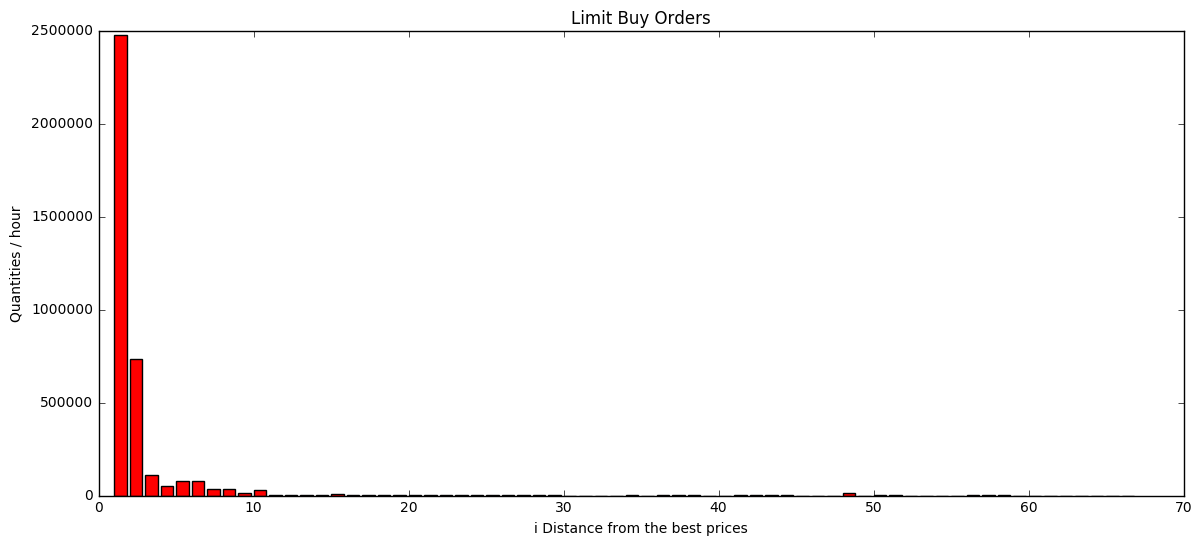

In [15]:
# Buy orders 

X = np.arange(1,67)

plt.figure(1)
plt.title('Limit Buy Orders')
plt.xlabel('i Distance from the best prices')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['lambdasForLimitBuyOrder'][1:], color='r')

<Container object of 66 artists>

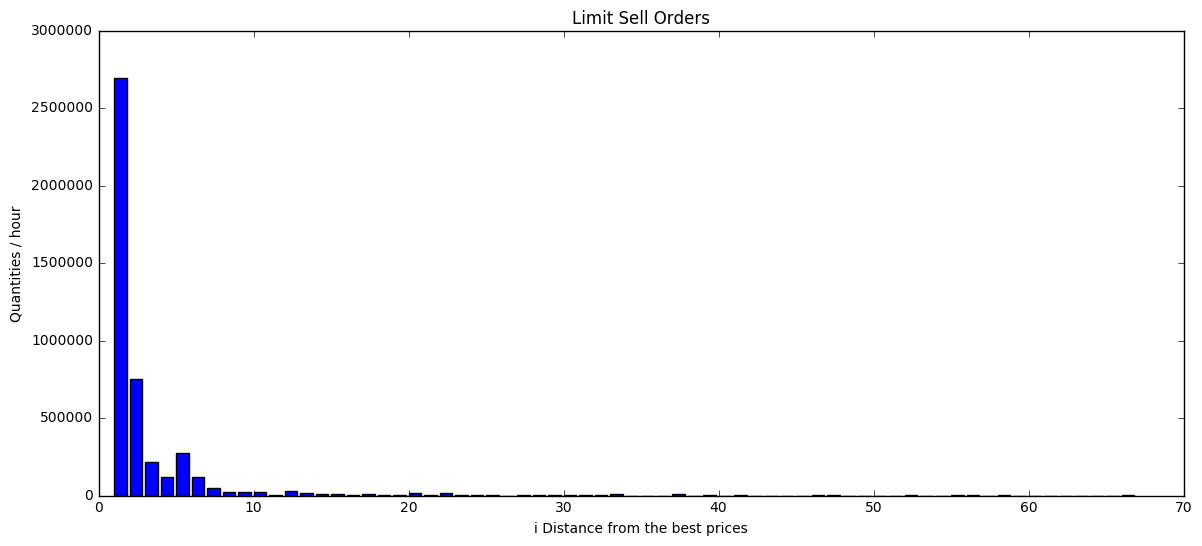

In [16]:
# Sell orders

X = np.arange(1,67)

plt.xlabel('i Distance from the best prices')
plt.title('Limit Sell Orders')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['lambdasForLimitSellOrder'][1:], color='b')

### Change in Quantities of Limit (Add) Orders

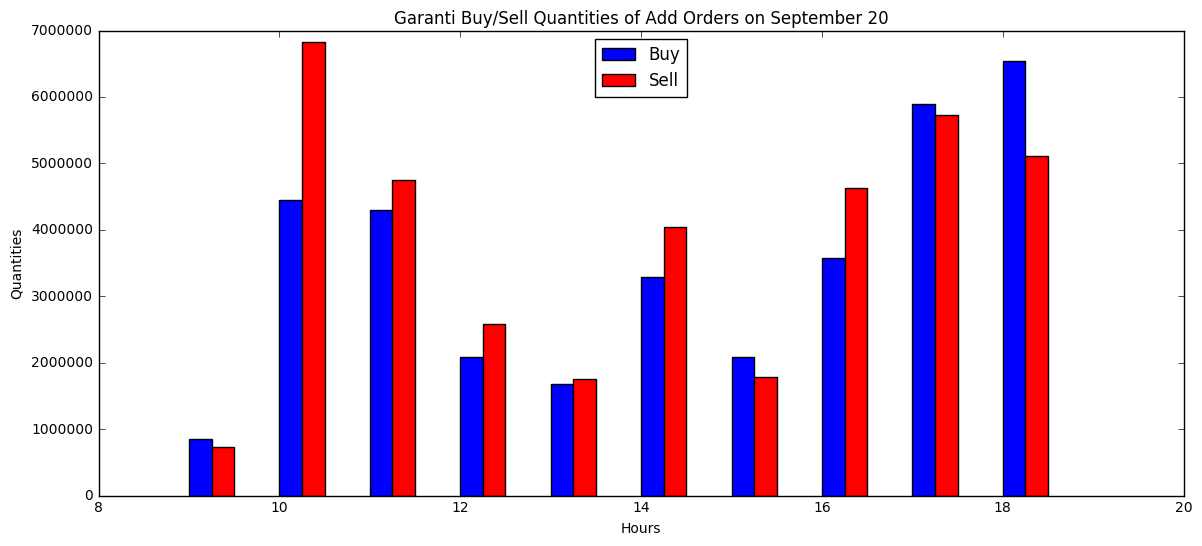

In [17]:
X = np.arange(9,19)

plt.figure(1)  
plt.bar(X + 0.00, orderFeatures['addBuyQuantity'], color='b', width=0.25, label='Buy')
plt.bar(X + 0.25, orderFeatures['addSellQuantity'], color='r', width=0.25, label='Sell')
plt.title('Garanti Buy/Sell Quantities of Add Orders on September 20')
plt.xlabel('Hours')
plt.ylabel('Quantities')
plt.legend(loc=9)

## Cancel orders 

"Cancellations of limit orders at a distance of i ticks from the opposite best quote occur at a rate proportional to the number of outstanding orders: If the number of outstanding orders at that level is x, then the cancellation rate is . This assumption can be understood as follows: if we have a batch of x outstanding orders, each of which can be canceled at an exponential time with parameter ϴ(i), then the overall cancellation rate for the batch is ϴ(i)x." (Cont et al, 2010). 

[*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU)

### Graph of Arrival Rates for Limit Orders with respect to Tick values i (distance)

<Container object of 66 artists>

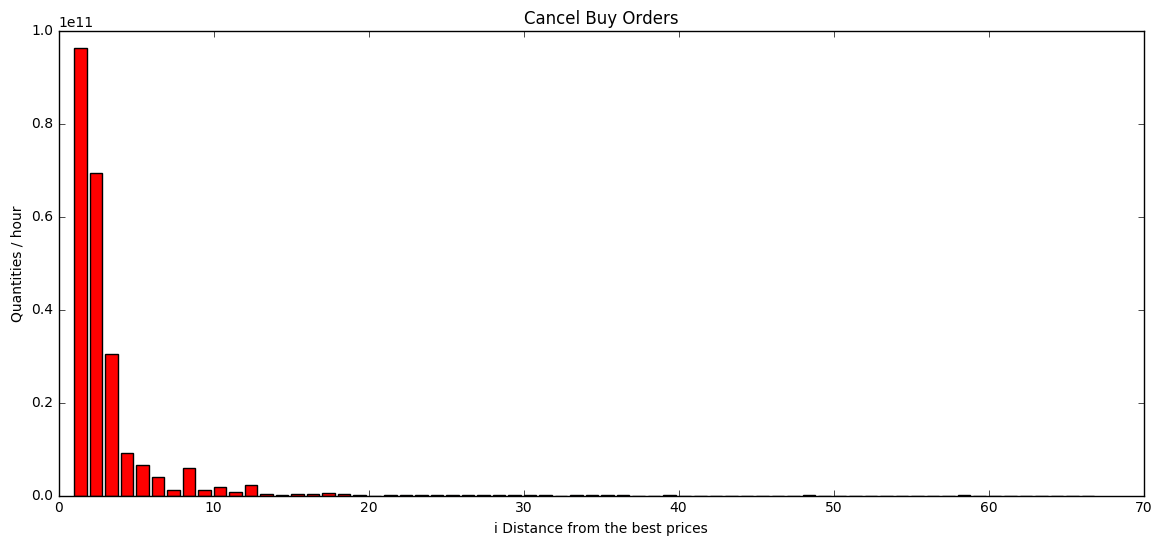

In [18]:
# Buy orders 

X = np.arange(1,67)

plt.figure(1)
plt.title('Cancel Buy Orders')
plt.xlabel('i Distance from the best prices')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['thetasForBuyCancelOrder'][1:], color='r')

<Container object of 66 artists>

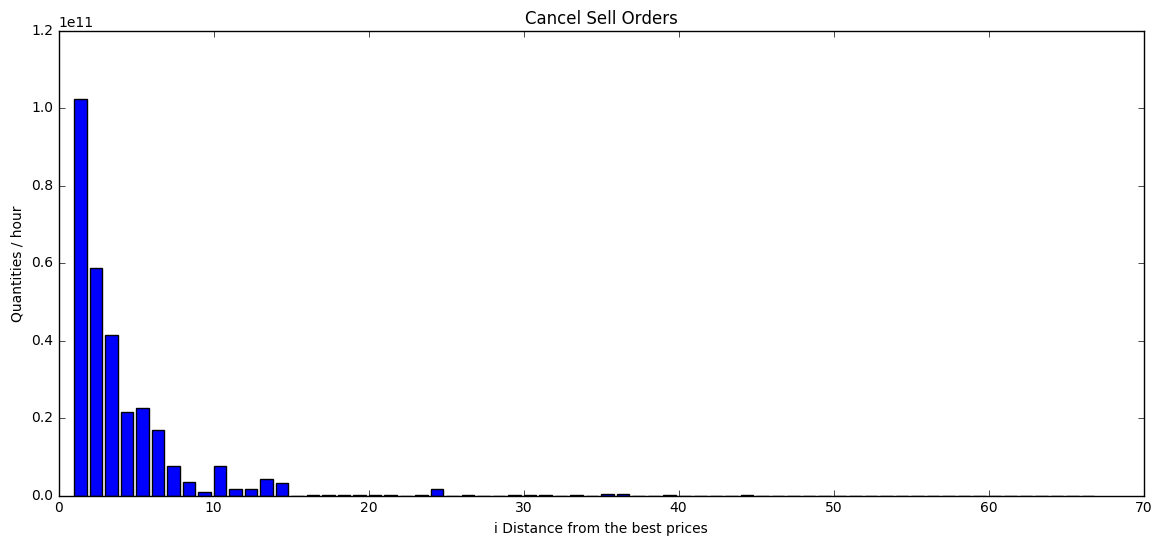

In [19]:
# Sell orders

X = np.arange(1,67)

plt.xlabel('i Distance from the best prices')
plt.title('Cancel Sell Orders')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['thetasForSellCancelOrder'][1:], color='b')

When I find the theta values, I multiply the quantity in the cancel order with the quantity in that price in the latest order book which is the last order book just before the cancel order. After that I use Maximum Likelihood Estimation and divide total values by 7 since there are 7 hours of operation.

> 9am - 10am, 1pm-2pm and after 6pm, the cancel orders are omitted.


## Hourly Limit Buy Orders Graphs

The quantities for limit and cancel orders which is i ticks away from the best prices are shown below.

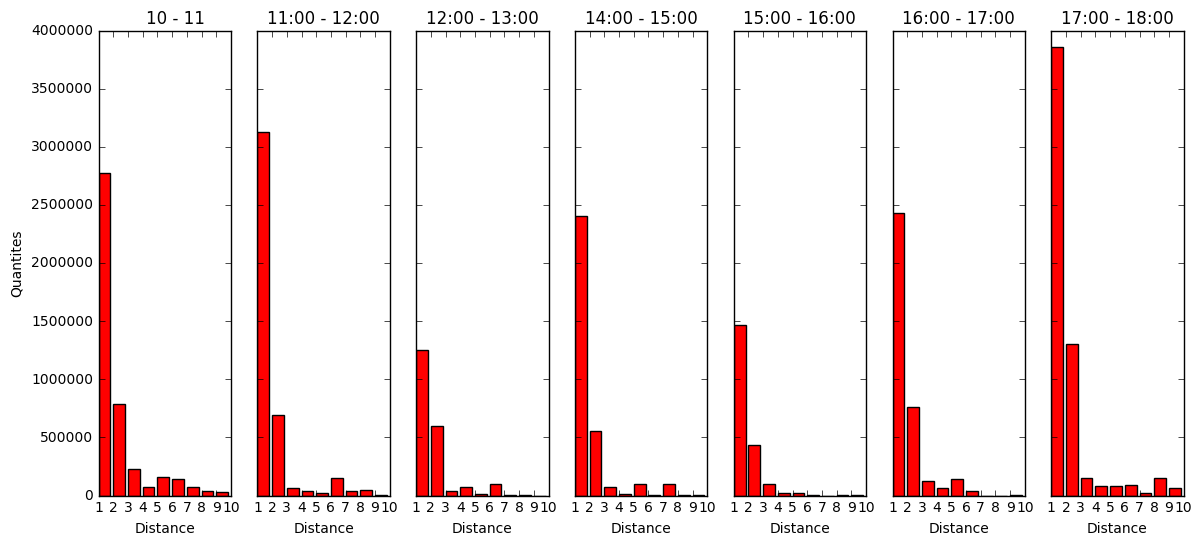

In [20]:
def hourly_orders(arr, buyOrCell):
    
    if buyOrCell:
        cl = 'r'
    else:
        cl = 'b'
    
    x = np.arange(1,10)
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    axes[0].set_title("    10 - 11")
    axes[0].set_ylabel("Quantites")
    axes[0].bar(x, arr[10-min_hour][1:10], color=cl)
    axes[0].set_xlabel("Distance")
    axes[1].set_title("11:00 - 12:00")
    axes[1].bar(x, arr[11-min_hour][1:10], color=cl)
    axes[1].set_xlabel("Distance")
    axes[2].set_title("12:00 - 13:00")
    axes[2].bar(x, arr[12-min_hour][1:10], color=cl)
    axes[2].set_xlabel("Distance")
    axes[3].set_title("14:00 - 15:00")
    axes[3].bar(x, arr[14-min_hour][1:10], color=cl)
    axes[3].set_xlabel("Distance")
    axes[4].set_title("15:00 - 16:00")
    axes[4].bar(x, arr[15-min_hour][1:10], color=cl)
    axes[4].set_xlabel("Distance")
    axes[5].set_title("16:00 - 17:00")
    axes[5].bar(x, arr[16-min_hour][1:10], color=cl)
    axes[5].set_xlabel("Distance")
    axes[6].set_title("17:00 - 18:00")
    axes[6].bar(x, arr[17-min_hour][1:10], color=cl)
    axes[6].set_xlabel("Distance")
    
hourly_orders(orderFeatures['lambdasForLimitBuyOrderHourly'], True)

## Hourly Limit Sell Orders Graphs

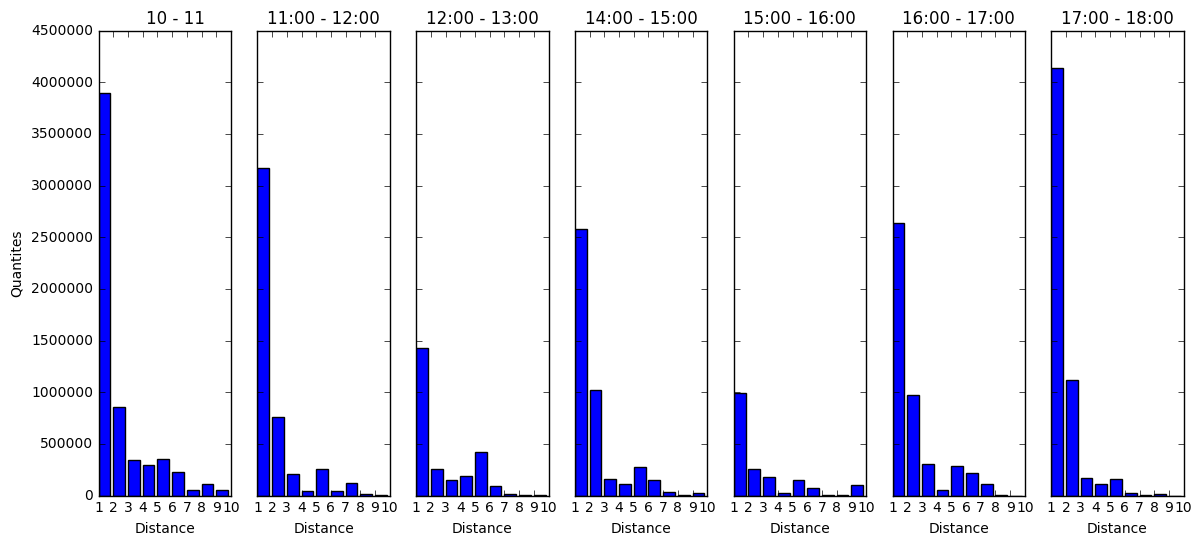

In [21]:
hourly_orders(orderFeatures['lambdasForLimitSellOrderHourly'], False)

## Hourly Cancel Buy Orders Graphs

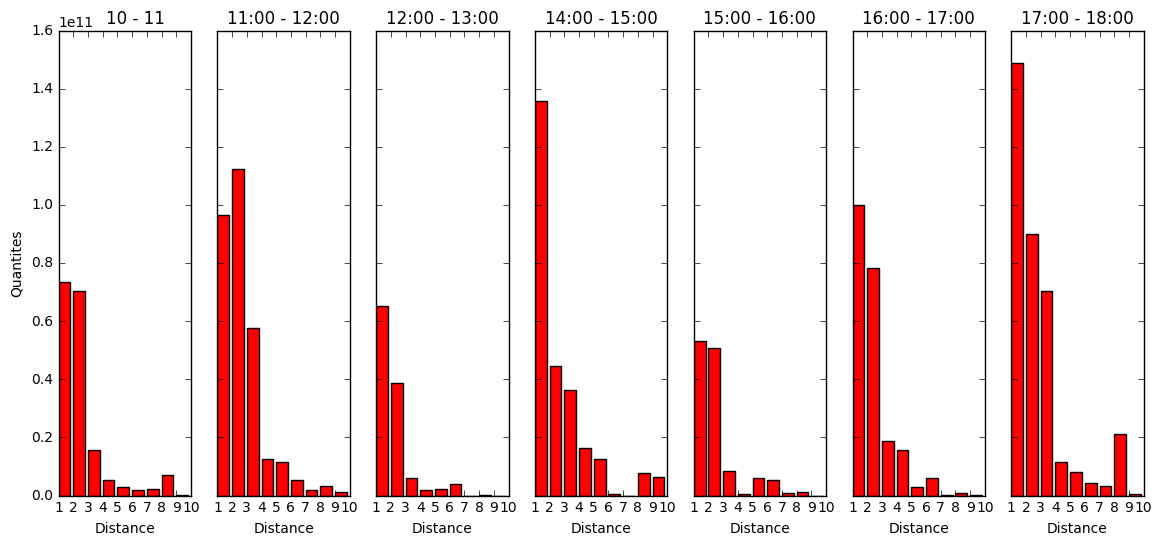

In [22]:
hourly_orders(orderFeatures['thetasForBuyCancelOrderHourly'], True)

## Hourly Cancel Sell Orders Graphs

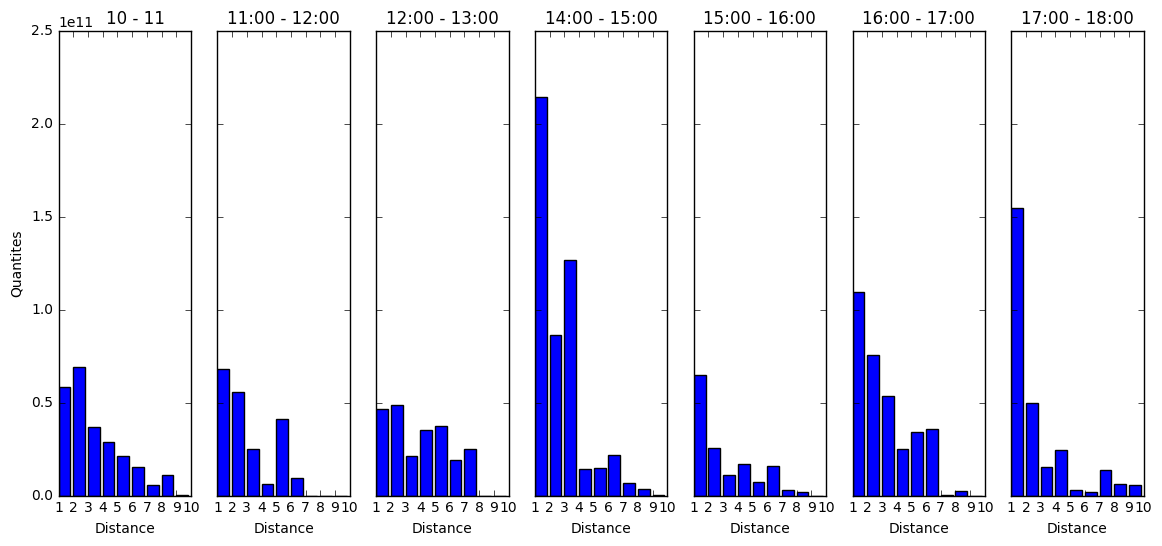

In [23]:
hourly_orders(orderFeatures['thetasForSellCancelOrderHourly'], False)

## Fitting Exponential Distribution to Current Dataset

In [26]:
def fit_exp_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 100000000000
    else:
        normalization = 1000000  
    
    y = data[1:10]
    nor_y = [a/normalization for a in y]

    fig, ax = plt.subplots(1, 1)
    params = expon.fit(nor_y)

    print("Lambda value for Exponential Distribution: {}".format(params[-1]))
    
    x = np.arange(0,9,0.1)
    ax.plot(x, expon.pdf(x, scale = params[-1], loc=params[-2]), 'r-', lw=2)
    nor_y_vals = [nor_y[int(val)] for val in x]

    ax.plot(x, nor_y_vals, color='b')
    
    d = scipy.zeros(len(nor_y_vals))
    ax.fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

    print(stats.kstest(nor_y, 'expon', args=params))
    plt.show()

### Limit Buy Orders

Lambda value for Exponential Distribution: 0.38614570151564864
KstestResult(statistic=0.55484309365237361, pvalue=0.0039147080923533917)


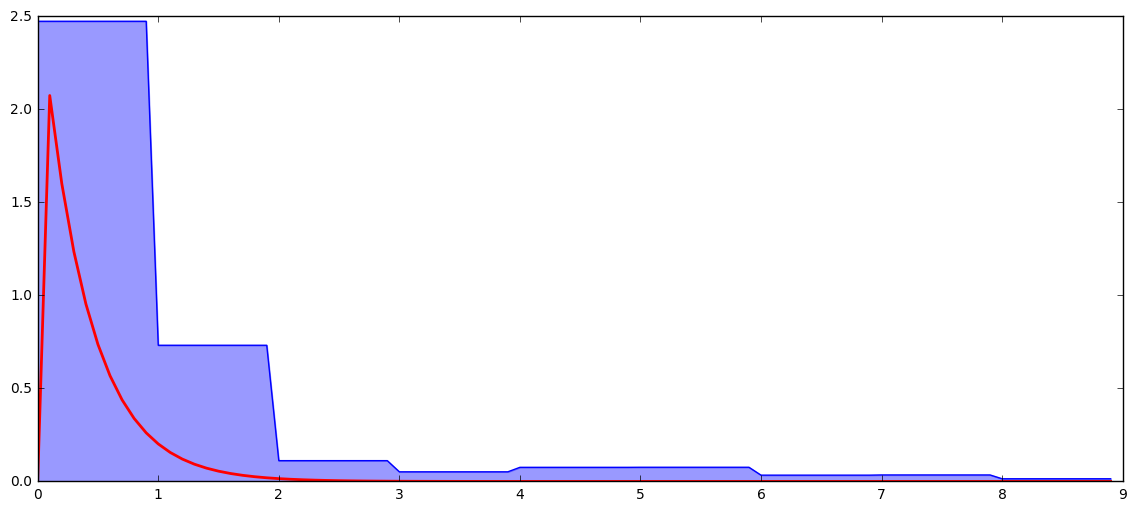

In [27]:
fit_exp_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False)

### Limit Sell Orders

Lambda value for Exponential Distribution: 0.45220233919172415
KstestResult(statistic=0.36114067172517189, pvalue=0.14773809579255426)


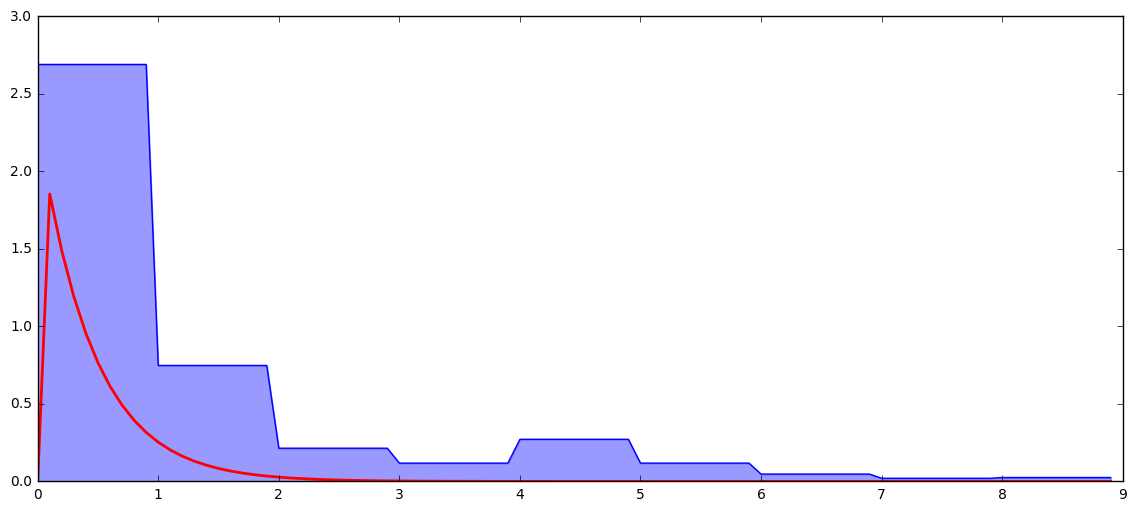

In [28]:
fit_exp_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False)

### Cancel Buy Orders

Lambda value for Exponential Distribution: 0.2366681809549414
KstestResult(statistic=0.3847844015236439, pvalue=0.10419520990408682)


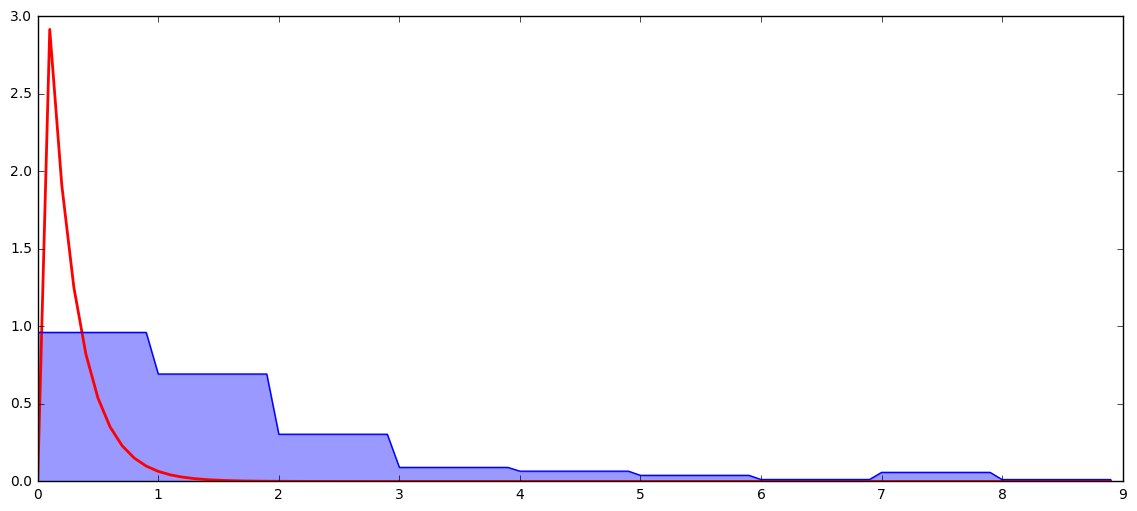

In [29]:
fit_exp_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True)

### Cancel Sell Orders

Lambda value for Exponential Distribution: 0.29759744067064436
KstestResult(statistic=0.14684297590545647, pvalue=0.99013151960488466)


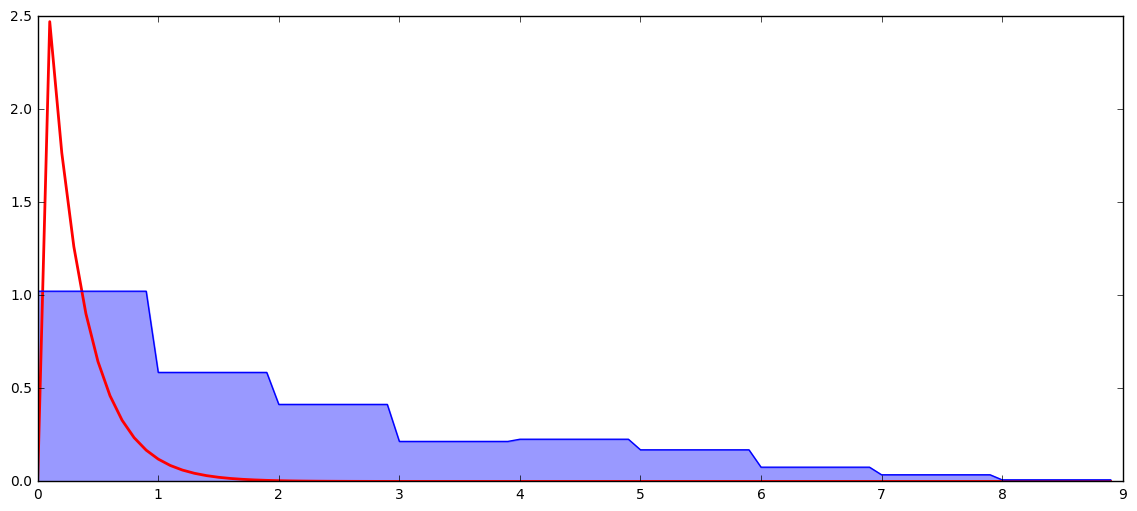

In [30]:
fit_exp_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True)

### Hourly Graphs

In [31]:
def hourly_graph_fit_exp_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 100000000000
    else:
        normalization = 1000000  
        
    x = np.arange(1,10)
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    
    for i in range(len(axes)):
        y = data[hours[i]-min_hour][1:6]
        nor_y = [a/normalization for a in y]
        
        params = expon.fit(nor_y)
        x = np.arange(0,5,0.1)
        axes[i].plot(x, expon.pdf(x, scale = params[-1], loc=params[-2]), 'r-', lw=2)
        
        nor_y_vals = [nor_y[int(val)] for val in x]
        axes[i].plot(x, nor_y_vals, color='b')
    
        d = scipy.zeros(len(nor_y_vals))
        axes[i].fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

        test_res = stats.kstest(nor_y, 'expon', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("lambda: {:.4f}\nst: {:.4f}\np val: {:.4f}".format(params[-1], test_res[0], test_res[1]))

### Fitting Exponential Distribution to Hourly Limit Buy Orders

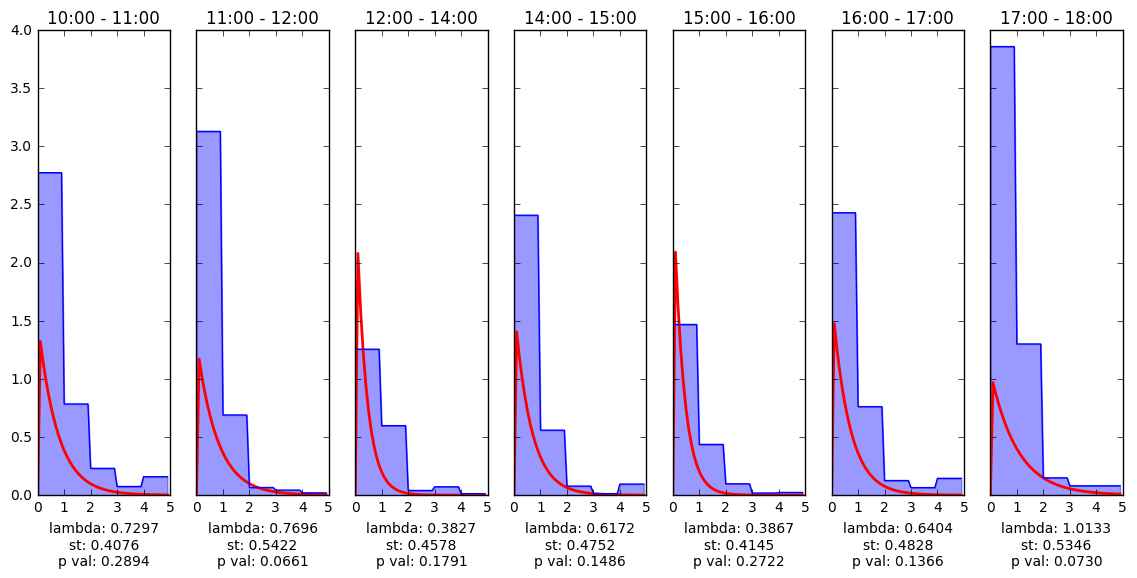

In [32]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False)

### Fitting Exponential Distribution to Hourly Limit Sell Orders

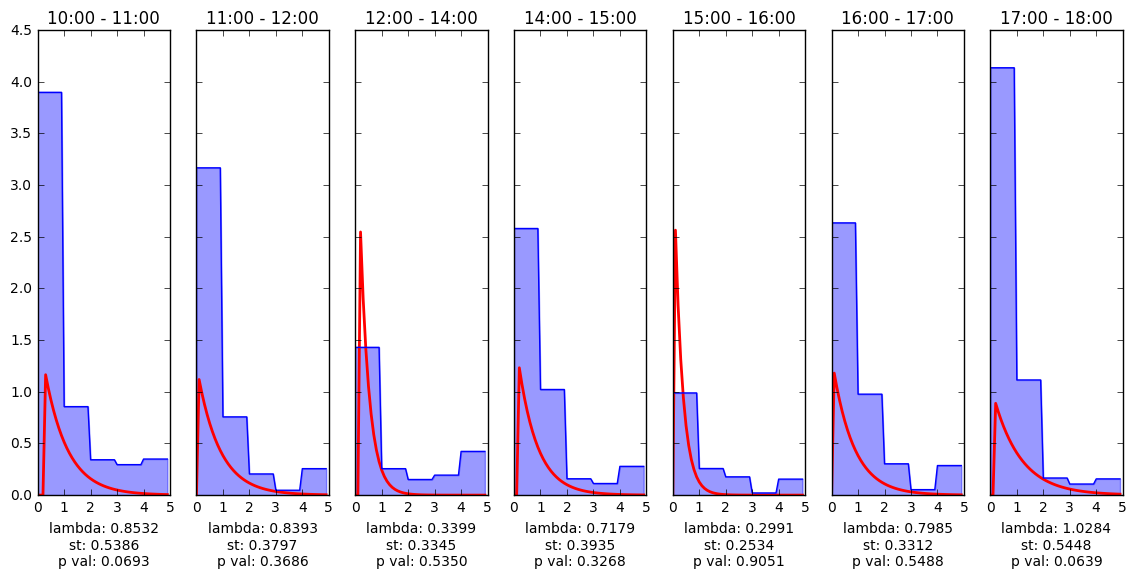

In [33]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False)

### Fitting Exponential Distribution to Hourly Cancel Buy Orders

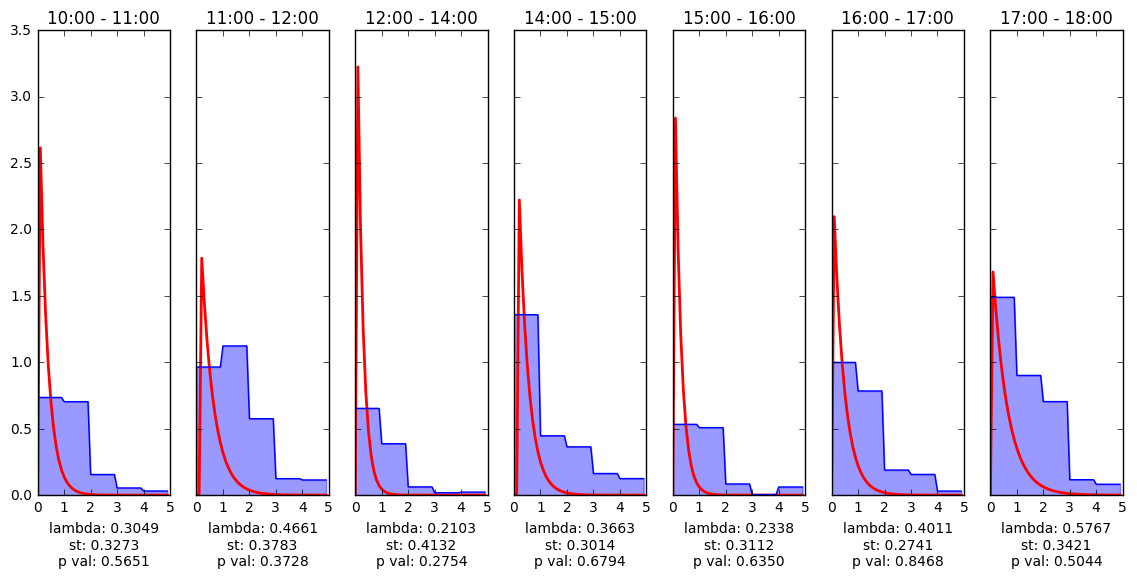

In [34]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['thetasForBuyCancelOrderHourly'], True)

### Fitting Exponential Distribution to Hourly Cancel Sell Orders

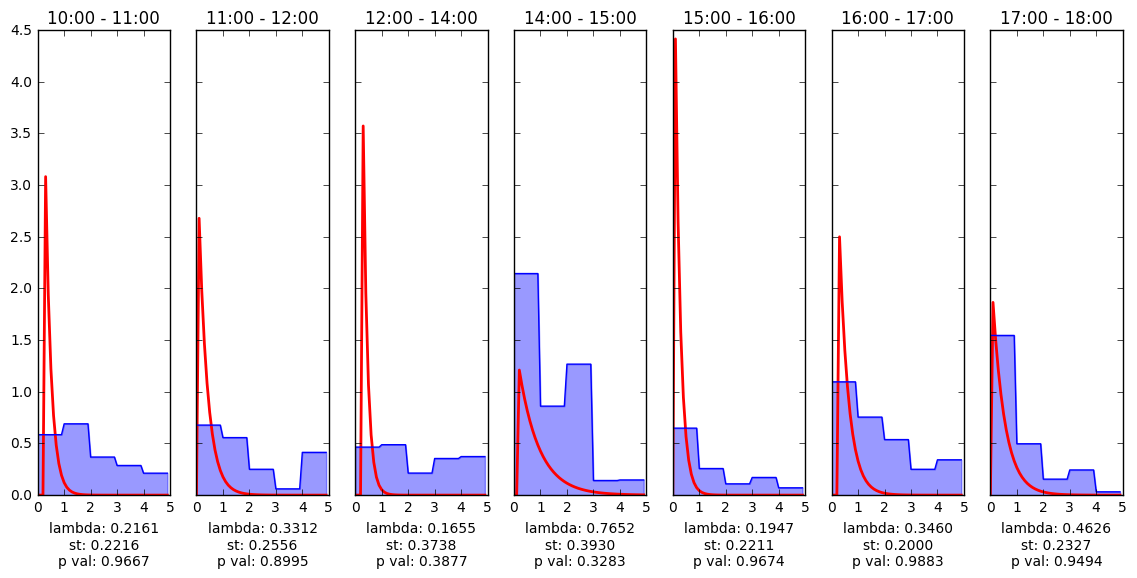

In [35]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['thetasForSellCancelOrderHourly'], True)

## Fitting Beta Distribution to Current Dataset

Data needs to be in the interval between 0 and 1.

In [39]:
def fit_beta_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 110000000000
    else:
        normalization = 10000000 
    
    y = data[1:6]
   
    nor_y = [a/normalization for a in y]

    fig, ax = plt.subplots(1, 1)
    params = stats.beta.fit(nor_y)
    print("a: {}, b: {}".format(params[0], params[1]))
    
    x = np.arange(0,5, 0.1)
    ax.plot(x, stats.beta.pdf(x, *params), 'r-', lw=2)
    nor_y_vals = [nor_y[int(val)] for val in x]

    ax.plot(x, nor_y_vals, color='b')
    
    d = scipy.zeros(len(nor_y_vals))
    ax.fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

    print(stats.kstest(nor_y, 'beta', args=params))
    plt.show()

### Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


a: 0.08432087104626715, b: 0.27361118704731563
KstestResult(statistic=0.64787507932903177, pvalue=0.014296847801087864)


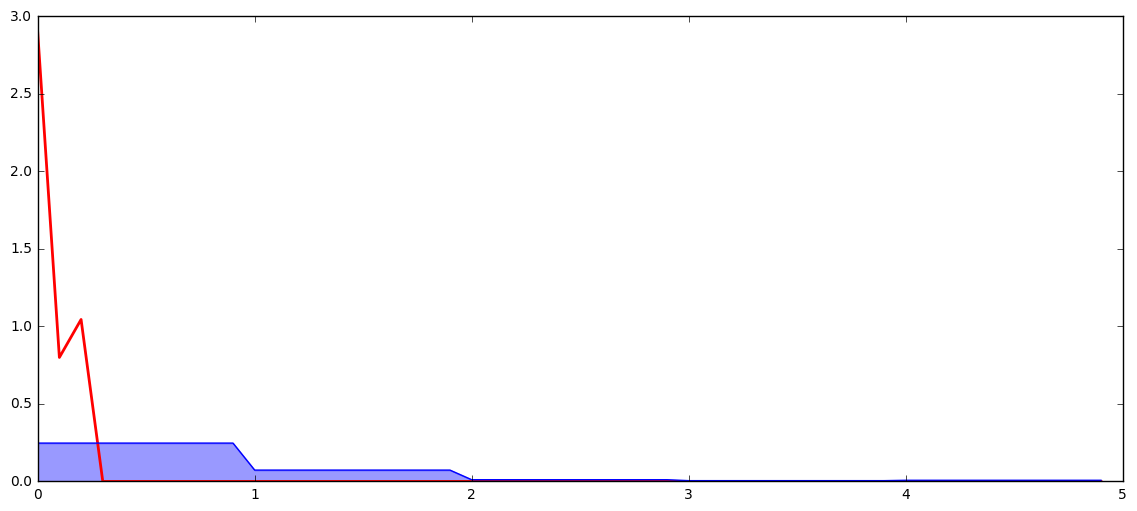

In [40]:
fit_beta_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False)

### Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


a: 0.10415630905551634, b: 0.3898678855247858
KstestResult(statistic=0.31819796823623248, pvalue=0.26120293546973516)


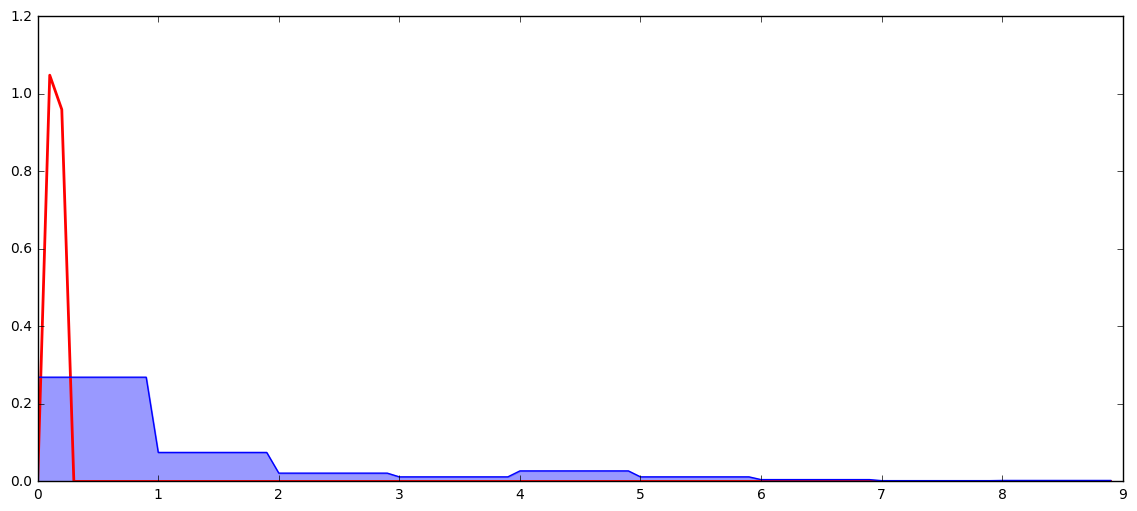

In [38]:
fit_beta_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False)

### Cancel Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.29583016946511831, 0.82177032040854869, 0.01113507718181818, 0.86421898739759406)
a: 0.2958301694651183, b: 0.8217703204085487
KstestResult(statistic=0.22451947211652518, pvalue=0.70219262762186907)


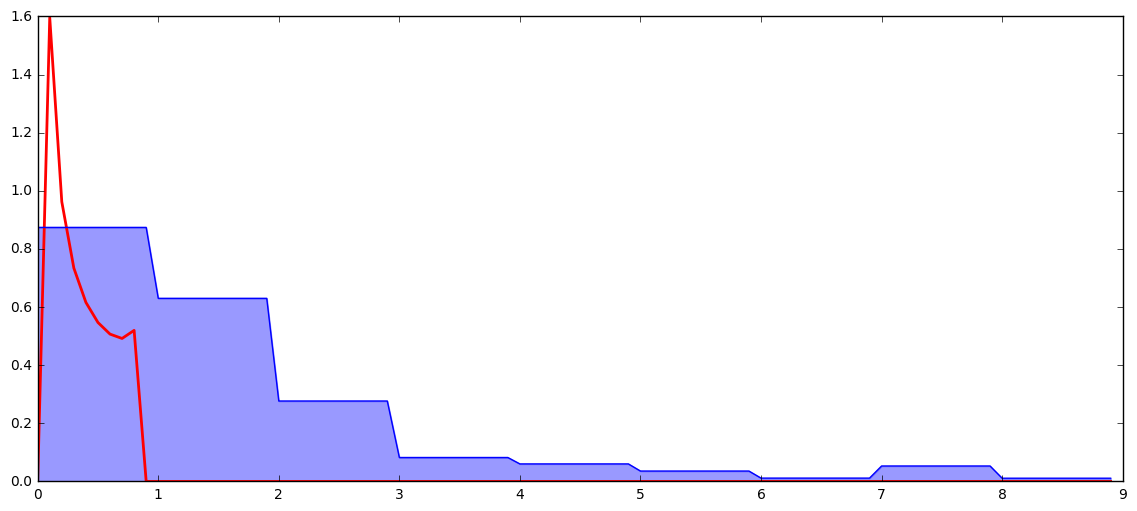

In [68]:
fit_beta_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True)

### Cancel Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.72529916594034916, 0.62177797882022223, -0.028845701636027239, 0.95868153514122167)
a: 0.7252991659403492, b: 0.6217779788202222
KstestResult(statistic=0.4116410932675072, pvalue=0.068090609768530541)


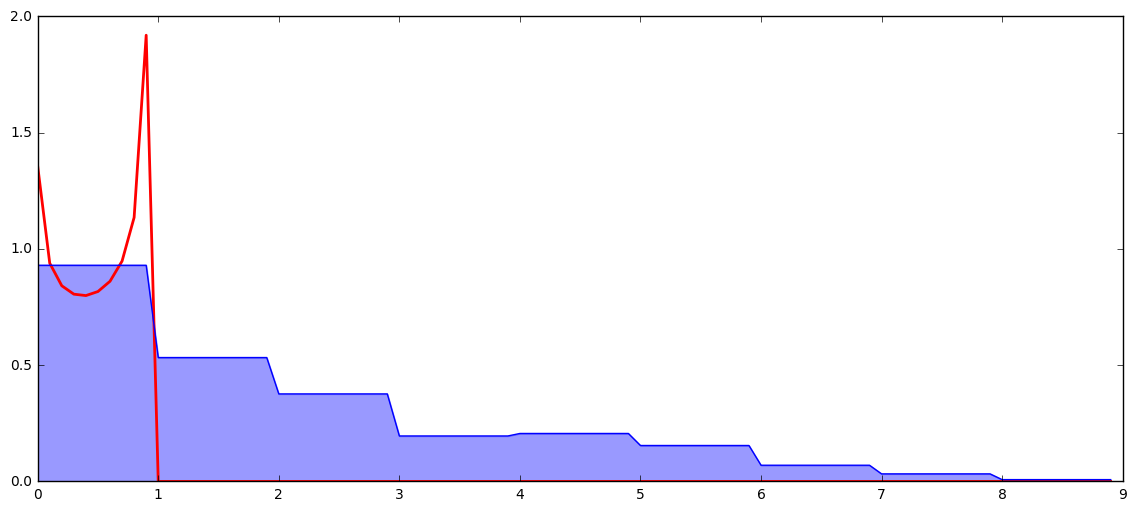

In [69]:
fit_beta_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True)

### Hourly Graphs

In [9]:
def hourly_graph_fit_beta_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 10000000000
    else:
        normalization = 4500000
    
        
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    
    for i in range(len(axes)):
        y = data[hours[i]-min_hour][1:6]
        nor_y = [a/normalization for a in y]
        
        params = stats.beta.fit(nor_y)
        x = np.arange(0,5,0.1)
        axes[i].plot(x, stats.beta.pdf(x, *params), 'r-', lw=2)
        
        nor_y_vals = [nor_y[int(val)] for val in x]
        axes[i].plot(x, nor_y_vals, color='b')
    
        d = scipy.zeros(len(nor_y_vals))
        axes[i].fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

        test_res = stats.kstest(nor_y, 'beta', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("a: {:.4f}\nb: {:.4f}\np val: {:.4f}".format(params[0], params[1], test_res[1]))

### Fitting Beta Distribution to Hourly Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


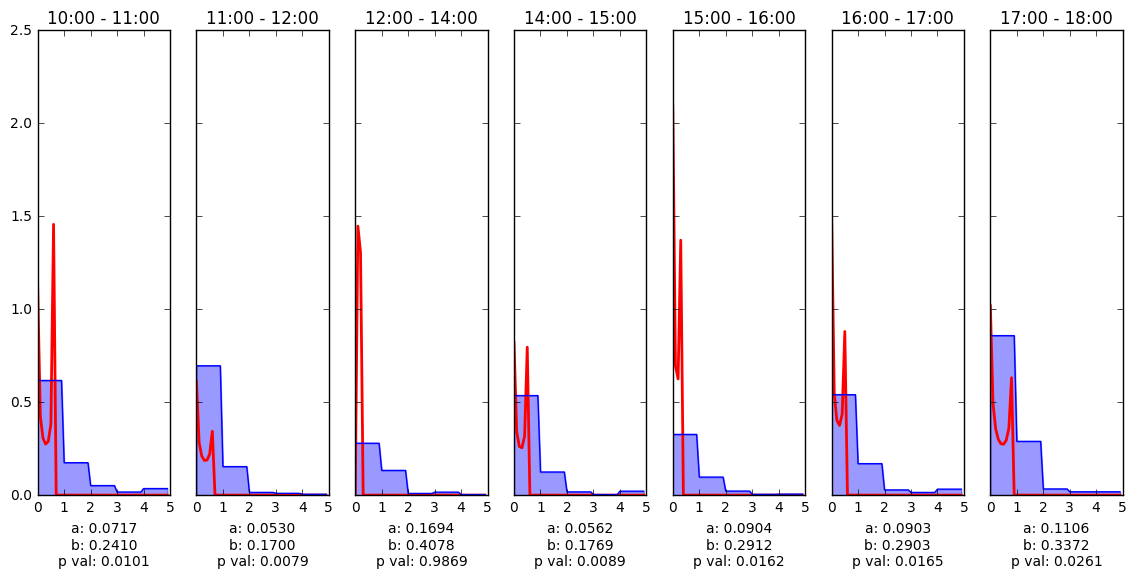

In [10]:
hourly_graph_fit_beta_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False)

### Fitting Beta Distribution to Hourly Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


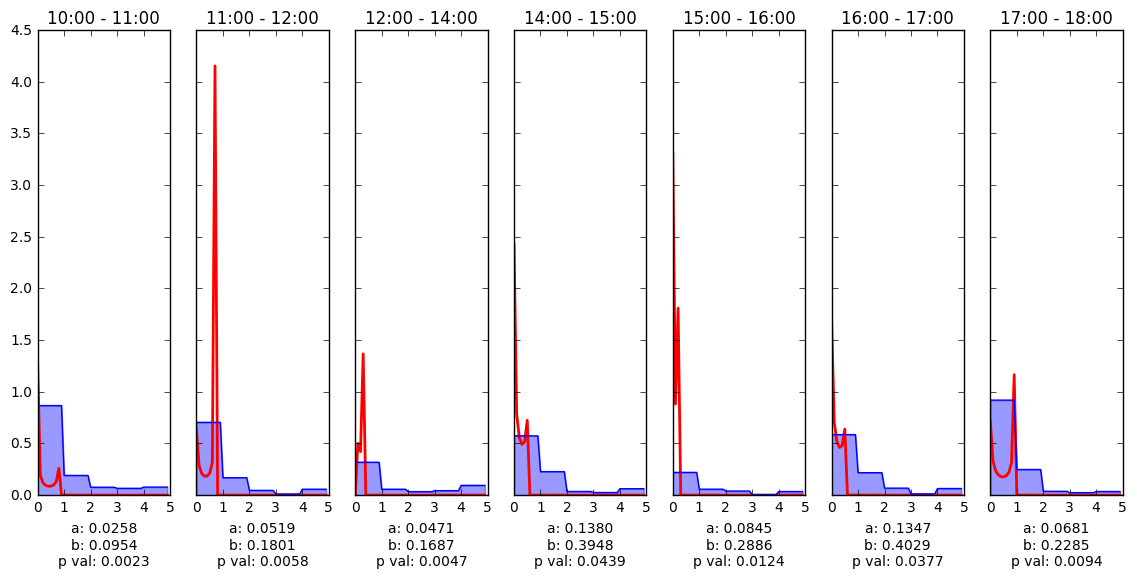

In [11]:
hourly_graph_fit_beta_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False)

## Fitting Weibull Distribution to Current Dataset

In [144]:
def fit_weib_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 110000000000
    else:
        normalization = 1000000
    
    y = data[1:10]
   
    nor_y = [a/normalization for a in y]

    fig, ax = plt.subplots(1, 1)
    params = stats.exponweib.fit(nor_y)
    print(params)
    
    x = np.arange(0,9, 0.1)
    ax.plot(x, stats.exponweib.pdf(x, *params), 'r-', lw=2)
    nor_y_vals = [nor_y[int(val)] for val in x]

    ax.plot(x, nor_y_vals, color='b')
    
    d = scipy.zeros(len(nor_y_vals))
    ax.fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

    print(stats.kstest(nor_y, 'exponweib', args=params))
    plt.show()

### Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


(2.1613816744988124, 0.25670440698651253, 0.01442042857142857, 0.0062974214891935165)
KstestResult(statistic=0.40576072298313953, pvalue=0.07493119139489024)


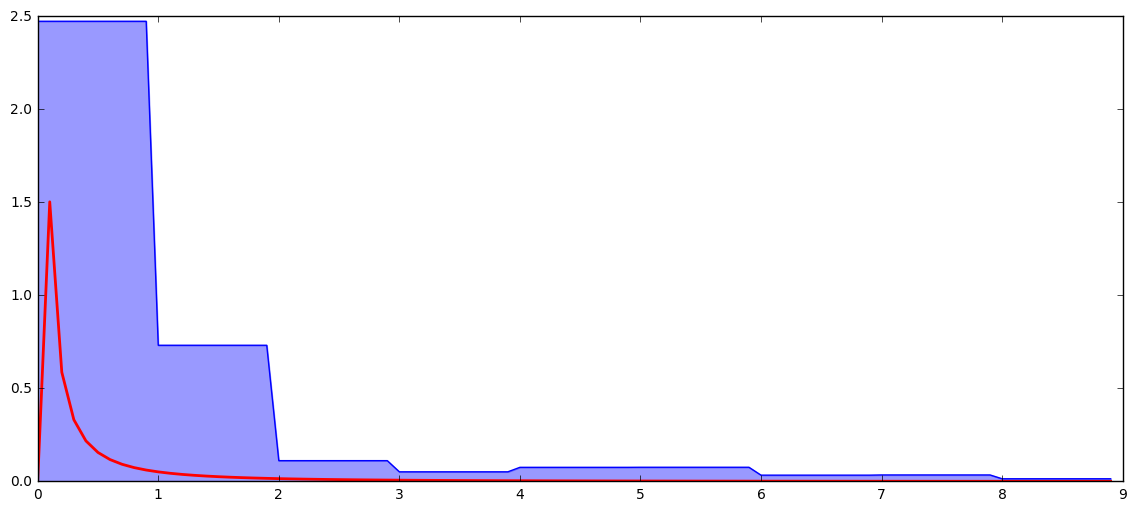

In [145]:
fit_weib_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False)

### Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


(2.1472817322203324, 0.29833604248253087, 0.020544714285714291, 0.015573898892007455)
KstestResult(statistic=0.32424544036016151, pvalue=0.24222712479033581)


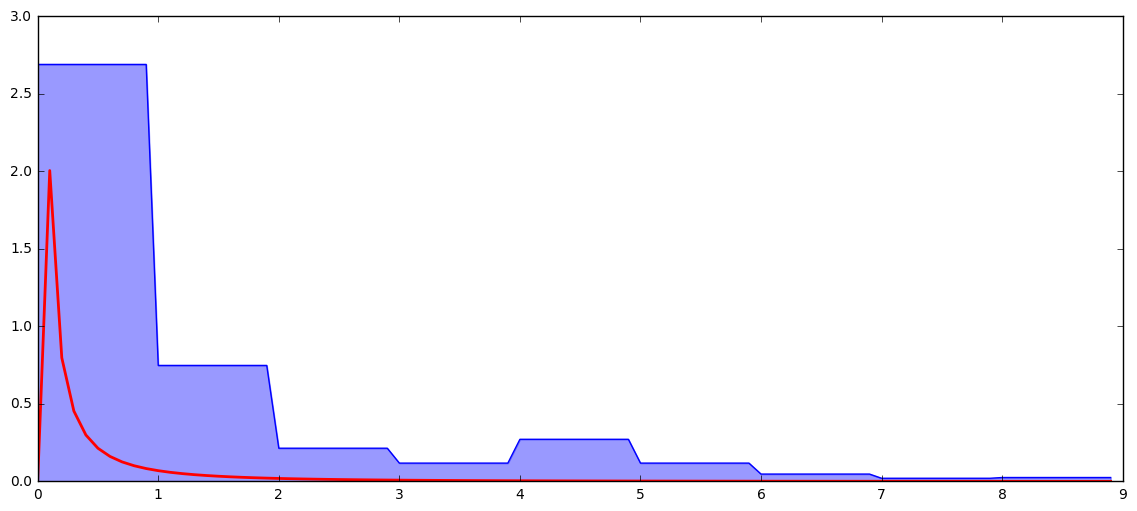

In [146]:
fit_weib_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False)

### Cancel Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


(1.9060589902205849, 0.29624192088296419, 0.01113507718181818, 0.029545821088769332)
KstestResult(statistic=0.17041865933280209, pvalue=0.95628562818093654)


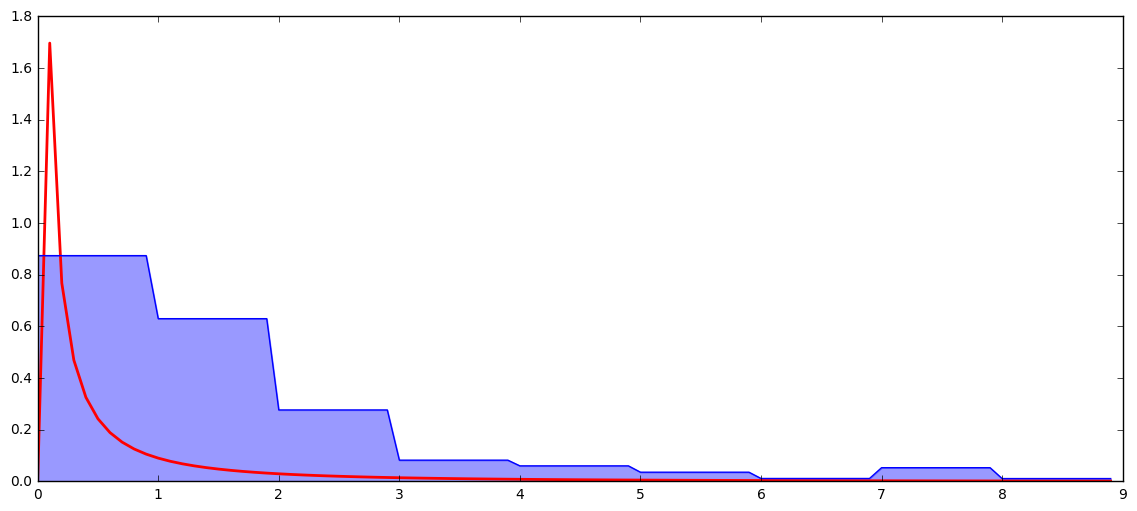

In [147]:
fit_weib_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True)

### Cancel Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


(0.22833911649914992, 2.1087621457847767, 0.0078634597285714269, 0.72476702923125824)
KstestResult(statistic=0.13463658188412553, pvalue=0.99677420104715242)


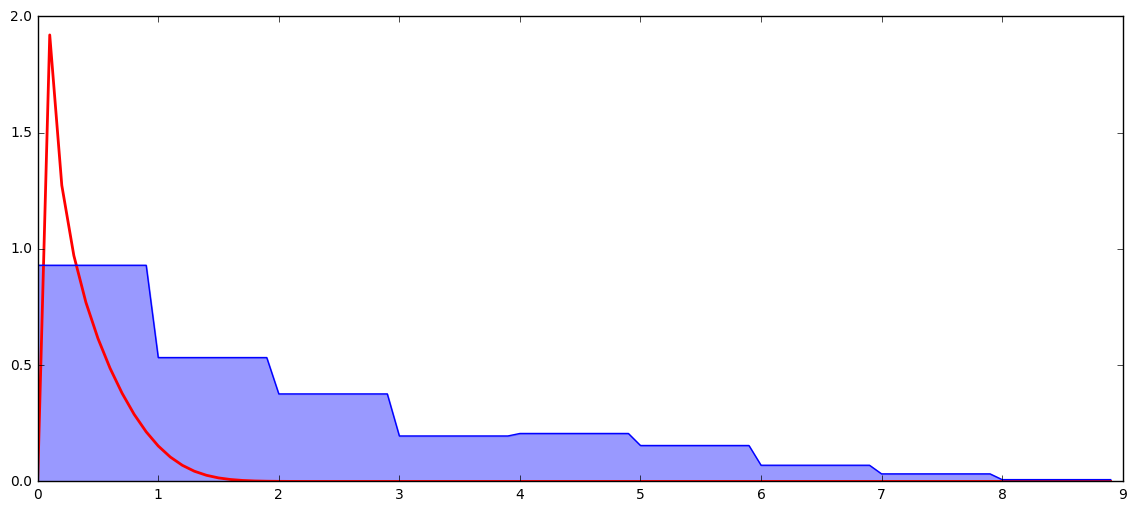

In [148]:
fit_weib_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True)

### Hourly Graphs

In [6]:
def hourly_graph_fit_weib_dist_and_test(data, cancel):
    
    if cancel:
        normalization = 110000000000
    else:
        normalization = 1000000
        
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    
    for i in range(len(axes)):
        y = data[hours[i]-min_hour][1:6]
        nor_y = [a/normalization for a in y]
        
        params = stats.exponweib.fit(nor_y)
        x = np.arange(0,5,0.1)
        axes[i].plot(x, stats.exponweib.pdf(x, *params), 'r-', lw=2)
        
        nor_y_vals = [nor_y[int(val)] for val in x]
        axes[i].plot(x, nor_y_vals, color='b')
    
        d = scipy.zeros(len(nor_y_vals))
        axes[i].fill_between(x, nor_y_vals, where=nor_y_vals>=d, color='b', alpha=0.4)

        test_res = stats.kstest(nor_y, 'exponweib', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("a: {:.4f}\nb: {:.4f}\np val: {:.4f}".format(params[0], params[1], test_res[1]))

### Fitting Weibull Distribution to Hourly Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


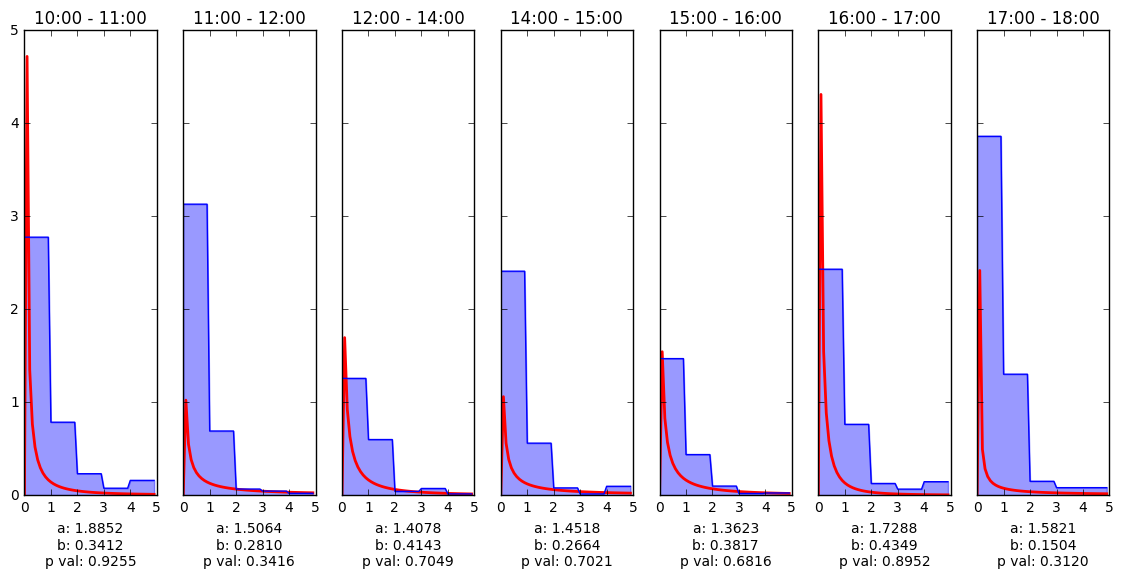

In [7]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False)

### Fitting Weibull Distribution to Hourly Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


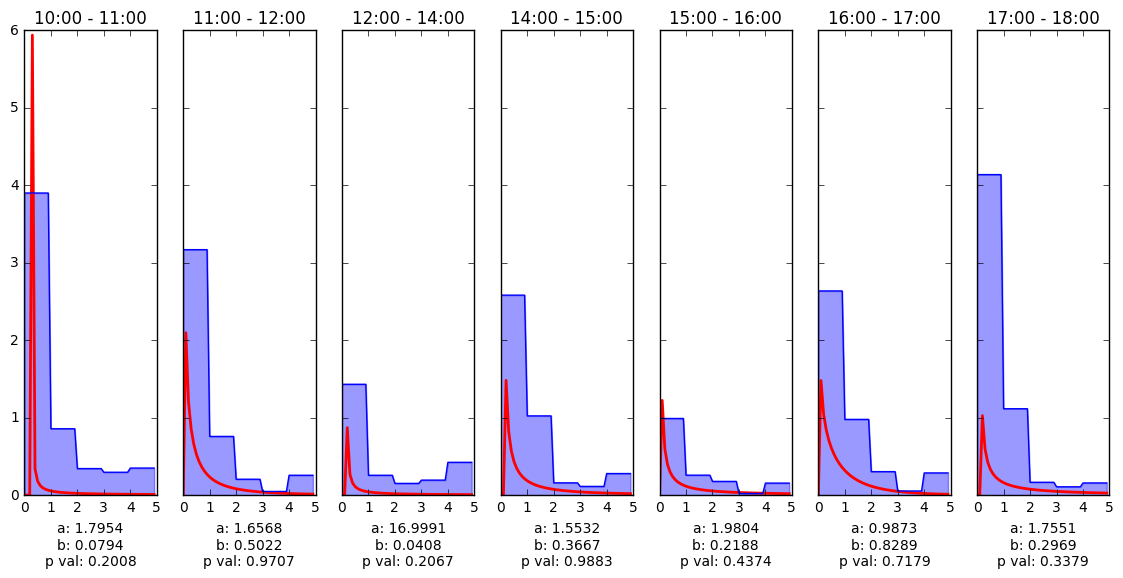

In [8]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False)